# Emotion Recognition Model Validation

The main objective of this notebook is to validate the trained model for emotion recognition

In [1]:
# Add project path to the PYTHONPATH

import os
import sys
from pathlib import Path

sys.path.append(Path(os.path.join(os.path.abspath(''), '../')).resolve().as_posix())

In [2]:
import pickle

## Load Tokenizer

Load `.pickle` file with the tokenizer

In [3]:
tokenizer_path = Path('../datasets/tokenizer.pickle').resolve()
with tokenizer_path.open('rb') as file:
    tokenizer = pickle.load(file)

## Load Model

Load the trained emotion recognition model

In [5]:
from tensorflow.keras.models import load_model

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [6]:
model = load_model('../models/model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Load test dataset

Load the dataset that will be used to test the model

In [7]:
import pandas as pd

In [8]:
test_data_path = Path('../datasets/data_test.csv').resolve()
test_data = pd.read_csv(test_data_path)
test_data = test_data[['label', 'text']]

In [9]:
test_data.head()

,label,text
0,sadness,I experienced this emotion when my grandfather...
1,neutral,"when I first moved in , I walked everywhere ...."
2,anger,"` Oh ! "" she bleated , her voice high and rath..."
3,fear,"However , does the right hon. Gentleman recogn..."
4,sadness,My boyfriend didn't turn up after promising th...


## Load Encoder

Load `.pickle` file with the encoder

In [10]:
encoder_path = Path('../models/encoder.pickle').resolve()
with encoder_path.open('rb') as file:
    encoder = pickle.load(file)

## Preprocess data

Preprocess the data that will be used

In [11]:
from nlpp.utils import preprocess
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dever\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
test_data['text'] = preprocess(test_data.text)
sequences = [text.split() for text in test_data.text]
list_tokenized = tokenizer.texts_to_sequences(sequences)
x_test = pad_sequences(list_tokenized, maxlen=100)
y_test = encoder.transform(test_data.label)

Time to clean up: 1.10 sec


## Results

Predict the labels and generate a confusion matrix

In [13]:
y_pred = model.predict(x_test)

In [14]:
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [16]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

Normalized confusion matrix
[[0.75036075 0.04329004 0.06060606 0.07792208 0.06782107]
 [0.23122239 0.60824742 0.07952872 0.03976436 0.04123711]
 [0.1145686  0.0466761  0.68033946 0.09618105 0.06223479]
 [0.09874608 0.01880878 0.11285266 0.73197492 0.03761755]
 [0.23668639 0.04289941 0.07100592 0.06952663 0.57988166]]


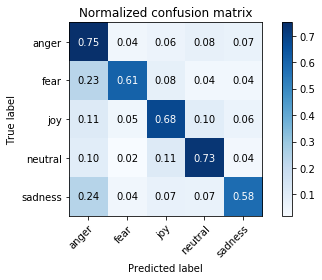

In [17]:
fig, ax = plot_confusion_matrix(y_test, y_pred, encoder.classes_, normalize=True)
# fig.savefig('confusion_matrix.png')

## Model measures

Now we check the precision, recall, fscore and support for the model.

In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.53007136, 0.79883946, 0.69010043, 0.70437406, 0.73271028]),
 array([0.75036075, 0.60824742, 0.68033946, 0.73197492, 0.57988166]),
 array([0.62126643, 0.69063545, 0.68518519, 0.7179093 , 0.64739884]),
 array([693, 679, 707, 638, 676], dtype=int64))

In [20]:
encoder.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype='<U7')

In [21]:
df = pd.DataFrame(precision_recall_fscore_support(y_test, y_pred))
df.columns = encoder.classes_
df.index = ['precision', 'recall', 'F-Score', 'support']
df

,anger,fear,joy,neutral,sadness
precision,0.530071,0.798839,0.690100,0.704374,0.732710
recall,0.750361,0.608247,0.680339,0.731975,0.579882
F-Score,0.621266,0.690635,0.685185,0.717909,0.647399
support,693.000000,679.000000,707.000000,638.000000,676.000000


In [22]:
f_scores = np.array(df.T['F-Score'])
support = np.array(df.T['support'])

weighted_f_scores = (f_scores*support).sum()/support.sum()

print(f'weighted F-Score: {weighted_f_scores}')

weighted F-Score: 0.6718457955045148
